<h3><center>Due Date: Feb 9, 2024 <br/>TA: Min Jun Park (minjun@stanford.edu)</center></h3> 

<h1><center>Lab 3: Normal move-out, multiples, and velocity analysis (Python version)</center></h1>

<h3><center><em>Your Name Here<em/></center></h3> 

In [3]:
!python3 -m pip install "sep-plot @ git+http://zapad.stanford.edu/bob/pySepPlot.git@68570d3e70e1ae5a90c2882ab0daf79b057d11c4"

  Using cached sep_plot-0.9.94-py2.py3-none-any.whl
  Using cached sep_python-0.9.70-py2.py3-none-any.whl
  Using cached genericsolver-1.0.7-py2.py3-none-any.whl

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# !wget https://raw.githubusercontent.com/minjun1/gp210/main/Lab3/cmp.H
# !wget https://raw.githubusercontent.com/minjun1/gp210/main/Lab3/cmp.HH
# !wget https://raw.githubusercontent.com/minjun1/gp210/main/Lab3/cmp.mult.H
# !wget https://raw.githubusercontent.com/minjun1/gp210/main/Lab3/cmp.mult.HH
# !wget https://raw.githubusercontent.com/minjun1/gp210/main/Lab3/Grey.py
# !wget https://raw.githubusercontent.com/minjun1/gp210/main/Lab3/Picking.py
# !wget https://raw.githubusercontent.com/minjun1/gp210/main/Lab3/..


In [13]:
%matplotlib inline
%matplotlib widget
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

import Vpick, Vscan
import sep_python.modes   
import Grey as sep_grey
io=sep_python.modes.default_io

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
**Abstract**

This lab is based on material from Chapters 3 and 4 of BEI. In the first portion you will be asked to compute Vnmo using a $(x^2, t^2)$ plot based on $(x, t)$ pairs you’ll pick from a CMP gather. In the second portion of the lab you will be given a velocity scan of the same CMP gather and asked to select the velocity function. In the final portion you will be given a multiple-contaminated CMP gather, and asked to correct it based on both the primary and multiple trend of the data.

---


<h2><center>PART 1: NORMAL MOVEOUT<h2/>

### Introduction

Chapter 3 of Jon's book *Basic Earth Imaging* (BEI) discusses the concept of **normal moveout (NMO) velocity**.
It is closely related to the "RMS velocity" and so-called "stacking velocity".
The basic notion is that in a horizontally layered earth, reflection travel-times from the flat layers approximately satisfy a hyperbolic move-out trajectory:
$$
t^2 \; \approx \;  \tau^2 + \frac{h^2}{V^2(\tau)} \;, 
$$
where $t$ is the two-way hyperbolic reflection travel-time, $\tau$ is the two-way vertical travel-time to the reflector, $h$ is the source/receiver offset, and $V$ is the NMO velocity.

### Exercise

You’ll be looking for the velocity that best describes the hyperbolic traveltime. $V_{nmo}$ is the short spread hyperbola approximation for the velocity. $V_{rms}$ is an approximation that uses all the offset information.
In this section, you are given a CMP gather from which you must determine $V_{rms}$ for reflections with $t_0$ at 1s, 2s, and 3s. The water bottom reflection has $t_0$ around 0.25s. To determine $V_{rms}$ for each of the reflectors:
- Toggle on 'Picking' mode and add a new picking using '+' button (to delete it use '-')
- Pick each of the reflections  as a new event
- Once you're done, type in the filename as a .npz file where you want to store the picking and press 'Save'
- Plot these values in $(x^2, t^2)$
- Perform a linear regression to obtain the value of $V_{RMS}$. You can do this however you want! Numpy has built in linear regression functions, so I have created an empty cell below where you could code your linear regression results. (Note: The slope of the line is the inverse of $V^2_{RMS}$ ).

The velocities you determine are to be compared with the velocities you’ll pick in the next exercise.

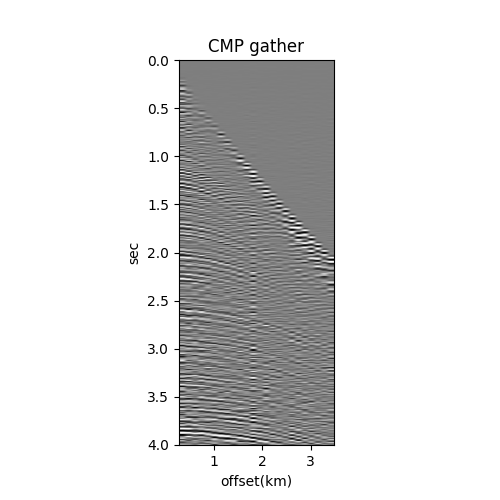

In [2]:
#################################################################
# No need to edit anything in this block
#################################################################
# this line reads in a dataset from an SEP formatted file.
cmp_sepVec=sep_python.modes.default_io.vector_from_storage("./cmp.HH")

# Create a Grey object, call its output() function which animates the image, and finally display the animation
sep_grey.Grey(plt,cmp_sepVec,figsize=(5,5),aspect='2',title='CMP gather',picking=1).output()


In [3]:
#################################################################
## If you choose to use python, code your linear regression here
#################################################################
filename = 'pick.npz'
# load this file as dictionary. once you do, you can access each of the single picked events as file['Pick 1'], etc.
picks = np.load(filename)
picks['Pick 1'][:,:]
# convert to (x^2,t^2) pairs

# perform linear regression using hyperbolic move-out equation from above

array([[0.45787662, 0.76956494, 1.10203247, 1.62151299, 1.9332013 ,
        2.26566883, 2.72281169, 2.88904545, 3.17995455, 3.28385065],
       [1.06199269, 1.12433036, 1.30095373, 1.40484984, 1.62303166,
        1.81004464, 1.94510958, 2.00744724, 2.14251218, 2.27757711]])

### Questions

1. List the *RMS*-velocities you obtained at $t_0$ =1s, 2s, and 3s

> **<tt>Your answer:</tt>**  Type answer here. 

<h2><center>PART 2: Velocity Analysis<h2/>

### Introduction

Chapter 4 of Jon’s book *Basic Earth Imaging* (BEI) discusses the concept of **NMO velocity analysis**. This is a method to estimate the “RMS” by finding the “NMO stacking velocity” which optimizes the CMP stack in some sense. As with the first part of the lab, the basic notion is that, in a horizontally layered earth, reflection travel-times from the flat layers approximately satisfy a hyperbolic move-out trajectory. In the first exercise you obtained the *RMS*-velocities in an “old-fashioned way”. Now you’ll do the same thing but with the help of velocity “scans”. The velocity scans in this lab display *semblance*, which is the normalized output-to-input energy ratio.

- Execute the next cell to bring up your "Velocity scan" display. There are two panels displayed. The left panel is the original CMP gather that you will be NMO correcting.

- The right panel is where you will be picking your velocity function. It has time (increasing downwards) as its vertical axis and velocity (increasing to the right) as its horizontal axis.

- Remember to pick velocities for the reflections with $t_0$ at 1s, 2s, and 3s to compare with the values you obtained in Part I.

- When you are happy with your velocity picking, save them to a .npz file by clicking the 'Save' button.

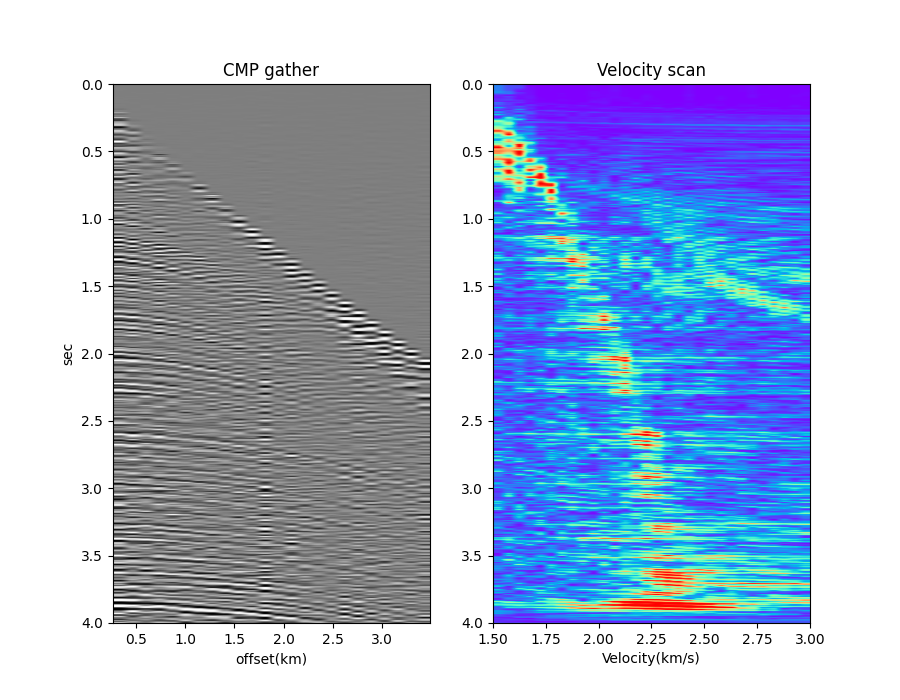

In [6]:
Vpick.Vpick(plt,cmp_sepVec,vmin=1.5, vmax=3, dv=0.05, figsize=(9,7),aspect='auto').output()

The program in  the following cell reads the .npz file you just created and performs normal moveout on the original CMP gather, plotting the flattened gather when it is done.

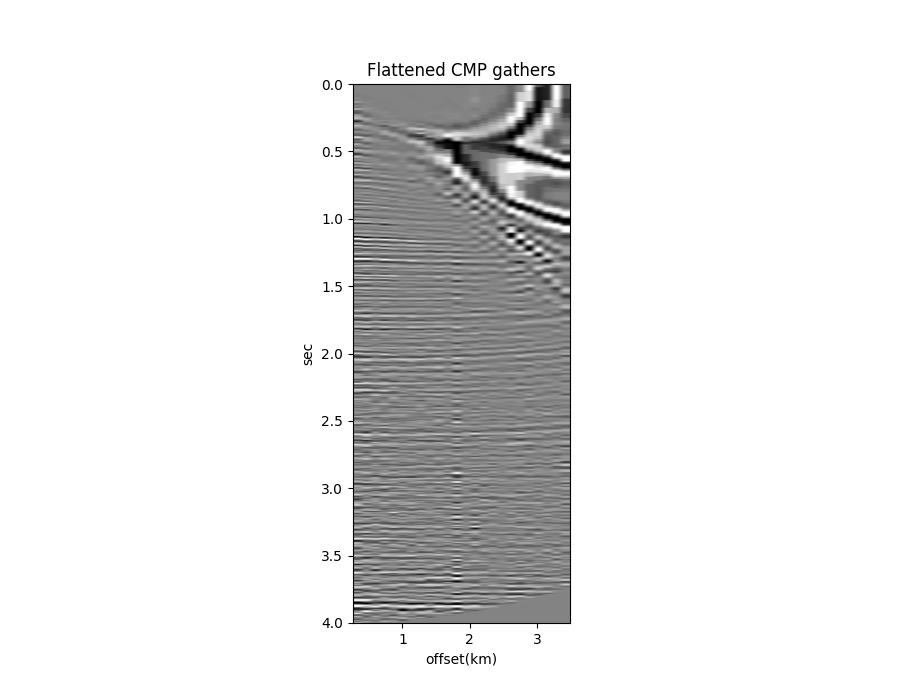

In [8]:
# convert .txt velocity picks file to sepVectors.
picks_1_filename='pick2.npz'
vrms = np.load(picks_1_filename)['Pick 1']

# perform nmo
nmo_cmp = cmp_sepVec.clone()
nmo = Vscan.NMO(nmo_cmp,cmp_sepVec,vrms)
nmo.adjoint(False,nmo_cmp,cmp_sepVec)

# plot the results
sep_grey.Grey(plt,nmo_cmp,figsize=(9,7),aspect=2,title='Flattened CMP gathers').output() 

### Interval velocity
Convert the picked RMS velocities into interval velocities using the Dix formula from section 3.4 of BEI and then plot the curve as a function of time (use tmax=4s) using standard matplotlib.

Dix Equation:
$$
v_i^2 = \frac{\tau_i V_i^2\; -\; \tau_{i-1} V_{i-1}^2}{\tau_i\; -\; \tau_{i-1}}
$$
where $v_i$ is the interval velocity of layer $i$, $\tau$ is the time in each layer, and $V$
is the RMS velocity.

In [ ]:
import matplotlib.pyplot as plt

# convert vrms to vint

# plot the result as a function of time
# plt.plot()

### Questions

For some of the questions below you have to write equations. You will need to learn how to enter 'math mode' in markdown. Double click on the hyperbolic move-out equation above to see how I did it.

1. How does a reflection event behave in the NMO corrected gather if the chosen velocity was too high/too low?

> **<tt>Your answer:</tt>**  Type answer here. 

2. After making your RMS velocity picks, you have to check the interval velocity estimates. Dramatic changes in interval velocity are unreasonable considering seismic reflection methodology. Why?

> **<tt>Your answer:</tt>**  Type answer here. 

3. If you look at the NMO corrected gather, you notice that the wavelet broadens with the increase of offset for the top events. If you look at lowest event, the wavelet doesn’t change too much. Why?

> **<tt>Your answer:</tt>**  Type answer here. 

4. Compare and contrast your experience in determining the velocities by selecting x, t pairs as in Part I versus picking a good stacking velocity curve with the aid of a velocity scan (this portion).

> **<tt>Your answer:</tt>**  Type answer here. 

5. RMS vs interval velocity

    - How accurate do you think your estimates of RMS velocity are (qualitatively) ?

    > **<tt>Your answer:</tt>**  Type answer here. 

    - How about your estimates of interval velocity ?

    > **<tt>Your answer:</tt>**  Type answer here. 

6. Assume you want to fit a parametric NMO velocity function to your scan of the form:
$$
V(\tau) ≈ V_0 + \alpha\tau^\beta .
$$
For your velocity scan, what are the approximate values of V0, α and β? You can do explicit curve fitting using your favorite method/software if you want, but you are not required to.

> **<tt>Your answer:</tt>**  Type answer here. 

Use the Dix relationship to convert the parametric $V(\tau)$ expression above into a parametric *interval velocity* function $v_i$. Check your general result by considering the special case of constant velocity. There are two choices of $\alpha$ and $\beta$ you can make – do both. Show all derivations in full and with clarity.

Dix Equation:
$$
v_i^2 = \frac{\tau_i V_i^2\; -\; \tau_{i-1} V_{i-1}^2}{\tau_i\; -\; \tau_{i-1}}
$$
where $v_i$ is the interval velocity of layer $i$, $\tau$ is the time in each layer, and $V$
is the RMS velocity.

> **<tt>Your answer:</tt>**  Type answer here. 

7. You may have noticed some artifacts in the velocity scanning process. These are caused by CMP data truncation at (a) near offsets and (b) far offsets. Consider a CMP gather which contains only an impulse at (a) zero offset, and (b) the farthest offset. Write down a mathematical expression for the trajectory each impulse will make in velocity space. Use the hyperbolic travel-time equation. How different these cruves would be?

> **<tt>Your answer:</tt>**  Type answer here. 

<h2><center>PART 3: MULTIPLE INFESTED DATA<h2/>

### Exercise

This portion of the lab demonstrates a large problem in seismic imaging, namely the existence and strength of multiples. Often, as in this example, the strength of the multiples is so much greater than that of the primaries that primary energy is overwhelmed. This makes picking a suitable velocity function, difficult, and severely hinders any automated picking approach.


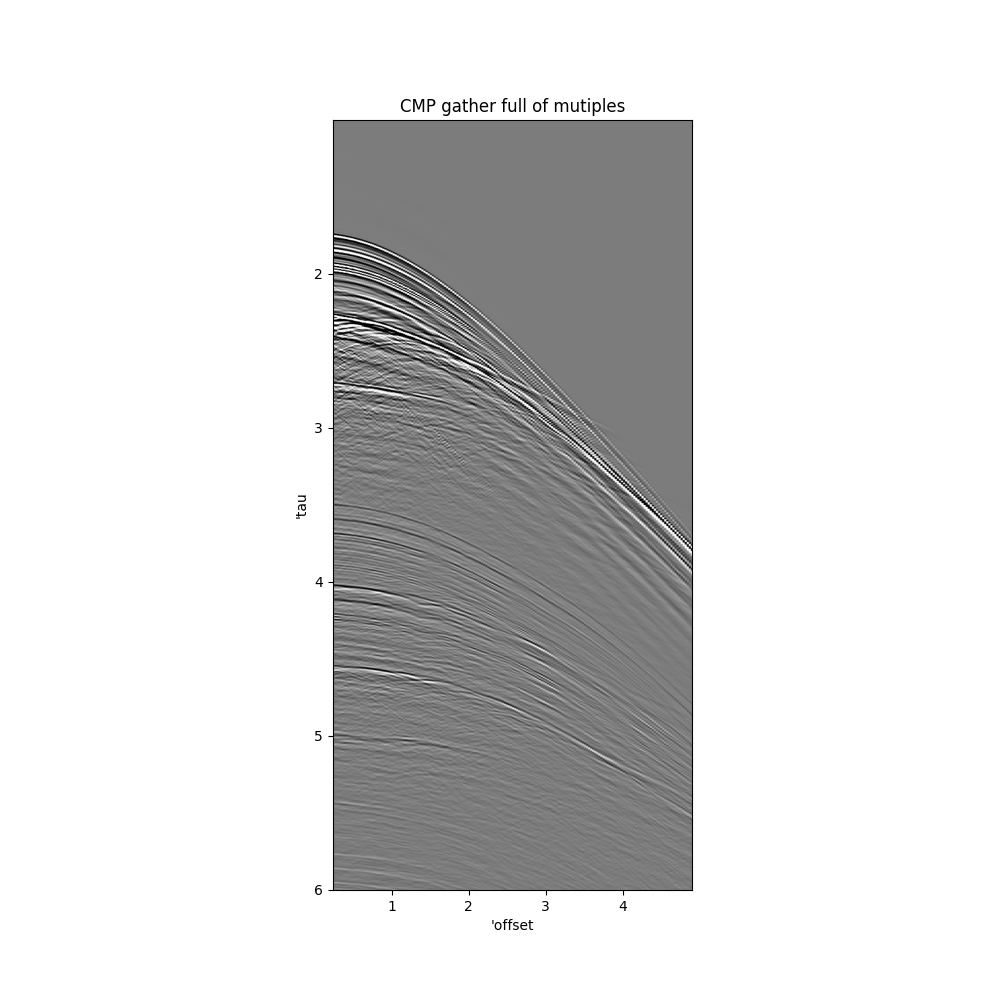

In [9]:
#read in the multiple infested CMP gather
cmp_mult_sepVec=sep_python.modes.default_io.vector_from_storage("./cmp.mult.HH")
# Create a Grey object, call its output() function which animates the image, and finally display the animation
sep_grey.Grey(plt,cmp_mult_sepVec,figsize=(10,10),aspect=2,title='CMP gather full of mutiples').output() 

Execute the next cell for a new CMP gather and its semblance panel. This gather is heavily infested with multiples.

- Select a velocity function that flattens the primary reflections. You will find this a much more difficult task, the CMP gather is infested with multiples while the semblance scan energy is concentrated at the multiple energy velocity. 
- Select a velocity function that flattens the multiples (as a new picking).
- Again, save these picks.

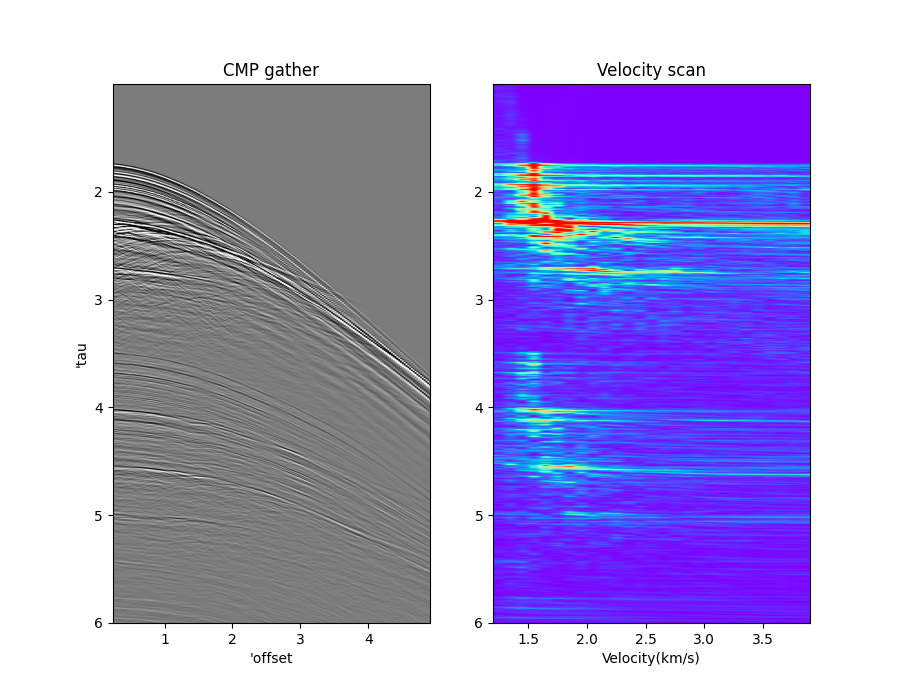

In [10]:
Vpick.Vpick(plt,cmp_mult_sepVec,vmin=1.2, vmax=4, dv=0.1, figsize=(9,7),aspect='auto').output()

Perform NMO with velocity picks of the primary reflections.

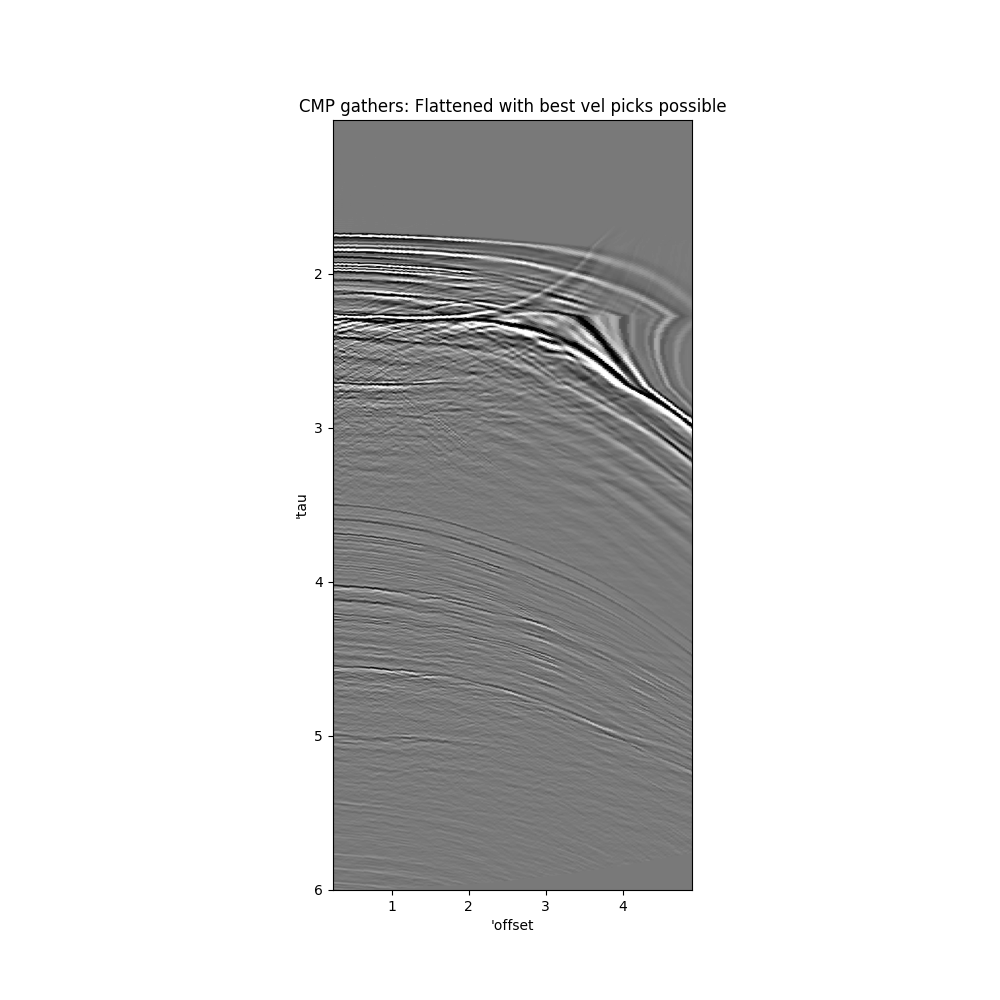

In [12]:
picks_2_filename='pick3.npz'
vrms = np.load(picks_2_filename)['Pick 1']

# perform nmo
nmo_prim = cmp_mult_sepVec.clone()
nmo = Vscan.NMO(nmo_prim,cmp_mult_sepVec,vrms)
nmo.adjoint(False,nmo_prim,cmp_mult_sepVec)

# Grey.Graph(plt,vel_combined_sepVector,figsize=(5,8),transp='y',yreverse='y',grid='y',label1='tau',label2='vrms',title='RMS Velocity',legend=['vrms','vint']).output()
sep_grey.Grey(plt,nmo_prim,figsize=(10,10),aspect=2,title='CMP gathers: Flattened with best vel picks possible',label1='tau (sec)',label2='offset (km)').output() 

Perform NMO with velocity picks for the multiples.

In [ ]:
picks_3_filename='FILENAME'
# vrms = np.load(picks_3_filename)['Pick 2']

# perform nmo
nmo_mult = cmp_mult_sepVec.clone()
nmo = Vscan.NMO(nmo_mult,cmp_mult_sepVec,vrms)
nmo.adjoint(False,nmo_mult,cmp_mult_sepVec)

# Grey.Graph(plt,vel_combined_sepVector,figsize=(5,8),transp='y',yreverse='y',grid='y',label1='tau',label2='vrms',title='RMS Velocity',legend=['vrms','vint']).output()
Grey.Grey(plt,nmo_mult,figsize=(10,10),aspect=2,title='CMP gathers: Flattened with vel picks on multiples',label1='tau (sec)',label2='offset (km)').output() 

### Questions

1. How could either
    - the prominence of the multiple energy be decreased, or
    - a criteria be designed that would pick the primaries rather than the multiples?

(Don’t forget that multiples are not limited to the sea floor bottom and RMS velocity can decrease as a function of time)

> **<tt>Your answer:</tt>**  Type answer here. 